In [2]:
import pandas as pd
import numpy as np
import sys, gc
sys.path.append('/home/fvalle/phd/master_thesis/hsbm/')
sys.path.append('/home/fvalle/phd/master_thesis/')

In [6]:
df_info = pd.read_csv("TCGABiolinks_COAD.csv", index_col=0).sort_index()
df_info.columns

Index(['patient', 'sequenced', 'microRNA', 'SNP6', 'WGS', 'RNAseq',
       'Agilent.expression', 'methylation', 'normal_meth', 'complete',
       'MSI_status', 'methylation_subtype', 'MLH1_silencing',
       'expression_subtype', 'hypermutated', 'silent_mutrate',
       'nonsilent_mutrate', 'cancer', 'anatomic_organ_subdivision',
       'tumor_site', 'age_at_initial_pathologic_diagnosis', 'days_to_death',
       'days_to_last_followup', 'days_to_last_known_alive',
       'distant_metastasis_pathologic_spread', 'gender', 'histological_type',
       'history_of_colon_polyps', 'icd_o_3_histology', 'icd_o_3_site',
       'lymphatic_invasion_present', 'lymphnode_pathologic_spread',
       'lymphnodes_examined',
       'number_of_first_degree_relatives_with_cancer_diagnosis',
       'number_of_lymphnodes_examined', 'number_of_lymphnodes_positive_by_he',
       'person_neoplasm_cancer_status', 'preoperative_pretreatment_cea_level',
       'primary_tumor_pathologic_spread', 'prior_diagnosis', 

In [7]:
df_files.columns

Index(['cases.0.diagnoses.0.morphology',
       'cases.0.diagnoses.0.primary_diagnosis',
       'cases.0.diagnoses.0.tissue_or_organ_of_origin',
       'cases.0.diagnoses.0.tumor_grade', 'cases.0.diagnoses.0.tumor_stage',
       'cases.0.project.disease_type', 'cases.0.project.primary_site',
       'cases.0.samples.0.longest_dimension',
       'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id',
       'cases.0.submitter_id'],
      dtype='object')

In [9]:
df_files=pd.read_csv("files.dat", index_col=0)
df_files["tcga_id"]=df_files["cases.0.submitter_id"]
df_files.sort_values('tcga_id', inplace=True)
df_files=df_files[df_files['tcga_id'].isin(df_info['patient'])]

In [10]:
df_files = df_files.reset_index().set_index('tcga_id').transpose().append(df_info.reset_index().set_index('patient').reindex(index=df_files['tcga_id']).transpose()).transpose().reset_index().set_index("file_name")

In [78]:
df = pd.read_csv("mainTable.csv",index_col=0)

In [106]:
df_files=df_files.reindex(index=df.columns)

In [81]:
df[df_files.index].to_csv("mainTable_all.csv", index=True, header=True)

In [104]:
df.columns[~df.columns.isin(df_files.index)]

Index([], dtype='object')

In [83]:
df_files[~df_files.index.isin(df.columns)]

,tcga_id,primary_site,disease_type,primary_diagnosis,index,sequenced,microRNA,SNP6,WGS,RNAseq,...,number_of_lymphnodes_positive_by_he,person_neoplasm_cancer_status,preoperative_pretreatment_cea_level,primary_tumor_pathologic_spread,prior_diagnosis,residual_tumor,synchronous_colon_cancer_present,tumor_stage,vascular_invasion_present,vital_status
file_name,,,,,,,,,,,,,,,,,,,,,


In [11]:
df = df.reindex(columns=df.columns[df.columns.isin(df_files.index)])
df.to_csv("mainTable.csv", index=True, header=True)
df_files.fillna("unknown").to_csv("files.dat", index=True)

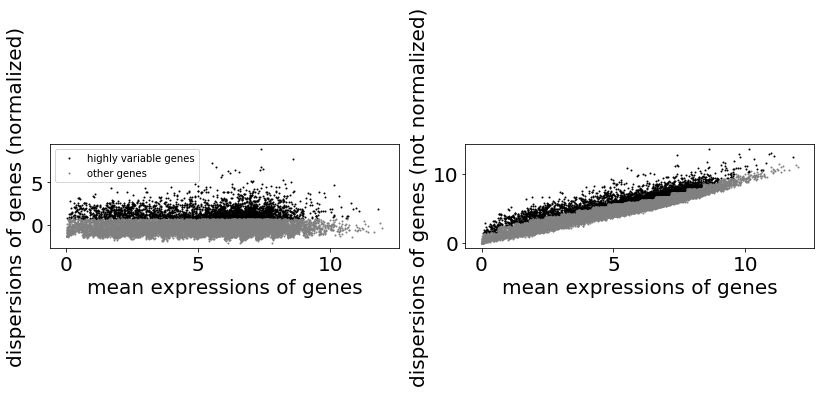

In [109]:
import scanpy as sc
adata = sc.AnnData(X=df.transpose(), obs=df_files)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=3000)
sc.pl.highly_variable_genes(adata)
hvg = adata.var[adata.var["highly_variable"]==True].index

In [110]:
from sbmtm import sbmtm

In [111]:
hsbm = sbmtm()

In [112]:
hsbm.make_graph_from_BoW_df(df.reindex(index=hvg))

In [113]:
hsbm.save_graph("graph.xml.gz")

In [114]:
del hsbm
gc.collect()

4276

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15659 entries, ENSG00000000419 to ENSG00000273489
Columns: 227 entries, 535e80df-ea81-4f5d-8f2e-e74ca97e9b01.htseq.counts.gz to 07ec290d-c41b-42eb-8cb2-07504451f732.htseq.counts.gz
dtypes: int64(227)
memory usage: 27.2+ MB
